Reading data

In [18]:
import pandas as pd
df = pd.read_csv('D:\da\Python\data_clustering\data\Mall_Customers.csv')

df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


K-Means Clustering in Python - the algorithm only trains on inputs. It works by finding the distinct groups of data (clusters) that are closest together.
Specifically, it partitions the data into clusters in which each point falls into a cluster whose mean is closest to that data point.

In [21]:
# import K-means class from the clusters module in Scikit-learn

from sklearn.cluster import KMeans

# select features for clustering

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Choosing the number of Python clusters to use (elbow method, which plots the within-cluster-sum-of-squares (WCSS) versus the number of clusters). Defined a for-loop that contains instances of the K-means class. This for-loop will iterate over cluster numbers one through 10.

In [22]:
from sklearn.preprocessing import MinMaxScaler

# feature normalization
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaler)
    wcss.append(kmeans.inertia_)

wcss

[23.040720326039906,
 14.085982559040602,
 9.059792751166924,
 6.121856618850359,
 3.58516691306247,
 3.2233070168998754,
 2.909542176792418,
 2.4699952223283117,
 2.287401904321795,
 1.8670022115349207]

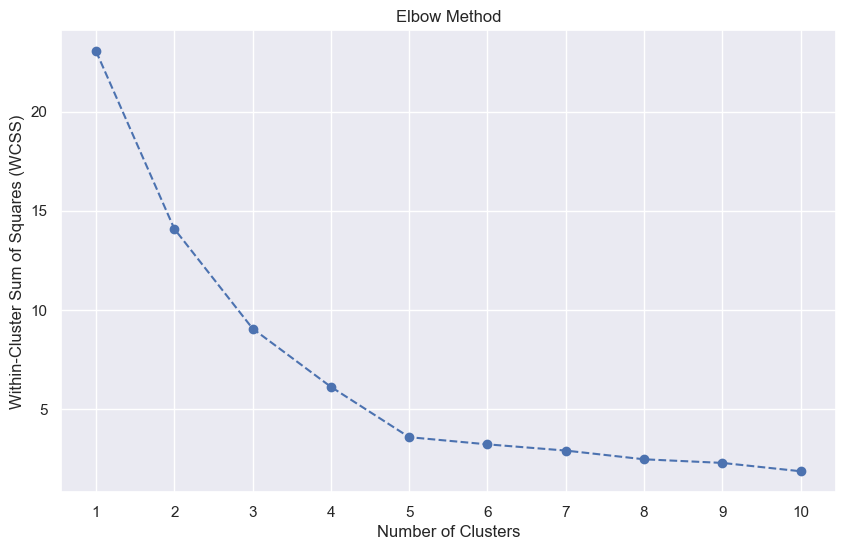

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting the Elbow Method graph with styling
plt.figure(figsize=(10, 6)) 
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')  
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))  
plt.grid(True) 
plt.show()


Apply K-Mean clustering

In [25]:
# trainig the K-Means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

Analyze segments

C:\Users\User\AppData\Local\Temp\ipykernel_7032\2406610589.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='*', label=f'Centroid {cluster_label + 1}')  # Plot the centroid


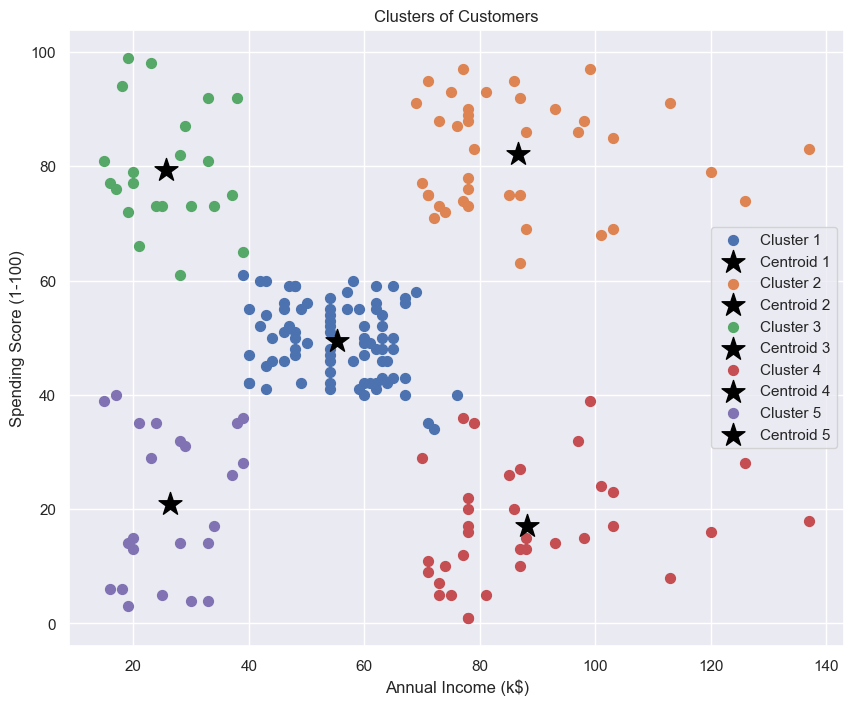

In [26]:
plt.figure(figsize=(10, 8))
for cluster_label in range(5):  # Loop through each cluster label
    cluster_points = X[kmeans.labels_ == cluster_label]
    centroid = cluster_points.mean(axis=0)  # Calculate the centroid as the mean position of the data points
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'],
                s=50, label=f'Cluster {cluster_label + 1}')  # Plot points for the current cluster
    plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='*', label=f'Centroid {cluster_label + 1}')  # Plot the centroid
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Conclusion
We can see that K-means found 5 clusters:
- Purple: low income, low spending score. This group does not have lots of potential
- Green: low income, high spending score. Are satisfied with the service and willing to spend more despite earning less.
- Blue: average income, average spending score. They are cautious with their spendings.
- Red: high income, low spending score. This group has a potention, should be targeted for the marketing team
- Orange: high income, high spending score. The 'ideal' group, they bring profit. Discounts and other offers can increase their spendings.